### matplotlib绘图 D:\study\python\江淮区域入梅异常年关键影响系统特征及海温信号\part1_1954_2020.py
1. 更改字体
2. pandas读取excel表格
3. 调整子图布局
4. 折线图、散点图
5. 绘图细节：坐标轴范围、坐标轴刻度、plt.gca()（修饰坐标轴）、坐标轴大小刻度长度、图例、图片添加文本

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''坐标'''
from matplotlib.ticker import MultipleLocator, FuncFormatter


In [2]:
'''更改字体'''
from matplotlib import font_manager 
plt.rcParams['font.sans-serif']='Times New Roman'

### 读取数据不重要

In [3]:
AH=pd.read_excel('D:\study\DATA\安徽.xls')
year=AH['年份']
ru=AH['入梅日']
chu=AH['出梅日']
AHlen=chu-ru

JS=pd.read_excel('D:\study\DATA\JS.xls')
JSyear=JS['年代']
JSru=JS['入梅日']
JSchu=JS['出梅日']
JSlen=chu-ru

'''计算部分'''
#标准化函数
def ZscoreNormalization(x):
    """Z-score normalization"""
    x = (x - np.mean(x)) / np.std(x)
    return x
ru_norm=ZscoreNormalization(ru)#标准化序列
chu_norm=ZscoreNormalization(chu)#标准化序列
JSru_norm=ZscoreNormalization(JSru)#标准化序列
JSchu_norm=ZscoreNormalization(JSchu)#标准化序列
ru_norm=ru_norm.fillna(0)
chu_norm=chu_norm.fillna(0)
AHlen=ZscoreNormalization(AHlen)
JSlen=ZscoreNormalization(JSlen)

#计算入梅早年、入梅晚年相关数据
ru_early=[]
ru_later=[]
ru_early_chu=[]
ru_later_chu=[]
ru_year_early=[]
ru_year_later=[]
for i in range(67):
    if ru_norm[i]<-0.9 and JSru_norm[i]<-0.9:
        ru_early.append(ru[i])
        ru_early.append(JSru[i])
        ru_early_chu.append(chu[i])
        ru_early_chu.append(JSchu[i])
        ru_year_early.append(JSyear[i])
    elif ru_norm[i]>0.9 and JSru_norm[i]>0.9:
        ru_later.append(ru[i])
        ru_later.append(JSru[i])
        ru_later_chu.append(chu[i])
        ru_later_chu.append(JSchu[i])
        ru_year_later.append(JSyear[i])
print('---------------------0.9倍标准差---------------------')
print('入梅偏早年份',ru_year_early)
print('入梅偏晚年份',ru_year_later)
chu_early=[]
chu_later=[]
chu_early_ru=[]
chu_later_ru=[]
chu_year_early=[]
chu_year_later=[]
for i in range(67):
    if chu_norm[i]<-0.9 and JSchu_norm[i]<-0.9:
        chu_early.append(chu[i])
        chu_early.append(JSchu[i])
        chu_early_ru.append(ru[i])
        chu_early_ru.append(JSru[i])
        chu_year_early.append(JSyear[i])
    elif chu_norm[i]>0.9 and JSchu_norm[i]>0.9:
        chu_later.append(chu[i])
        chu_later.append(JSchu[i])
        chu_later_ru.append(ru[i])
        chu_later_ru.append(JSru[i])
        chu_year_later.append(JSyear[i])
print('出梅偏早年份',chu_year_early)
print('出梅偏晚年份',chu_year_later)

'''求江淮地区入梅平均偏早日early_r、平均日ave_r、平均偏晚日later_r'''
print('--------入梅--------')
ru_early=np.array(ru_early)
ru_early_chu=np.array(ru_early_chu)
early_r=ru_early.mean()
print('平均入梅偏早日',early_r,'6/5')
print('入梅偏早年平均出梅日', ru_early_chu.mean(), '7/11')
ave_r=pd.concat([ru,JSru],axis=0).mean()
print('平均入梅日',ave_r,'6/17')
ru_later=np.array(ru_later)
ru_later_chu=np.array(ru_later_chu)
later_r=ru_later.mean()
print('平均入梅偏晚日',later_r,'6/28')
print('入梅偏晚年平均出梅日', ru_later_chu.mean(), '7/16')

'''求江淮地区出梅平均偏早日early_c、平均日ave_c、平均偏晚日later_c'''
print('--------出梅--------')
chu_early=np.array(chu_early)
chu_early_ru=np.array(chu_early_ru)
early_c=chu_early.mean()
print('平均出梅偏早日',early_c,'6/28')
print('出梅偏早年平均入梅日', chu_early_ru.mean(), '6/13')
ave_c=pd.concat([chu,JSchu],axis=0).mean()
print('平均出梅日',ave_c,'7/13')
chu_later=np.array(chu_later)
chu_later_ru=np.array(chu_later_ru)
later_c=chu_later.mean()
print('平均出梅偏晚日',later_c,'7/28')
print('出梅偏晚年平均入梅日', chu_later_ru.mean(), '6/16')

---------------------0.9倍标准差---------------------
入梅偏早年份 [1956, 1961, 1971, 1980, 1984, 1989, 1999, 2020]
入梅偏晚年份 [1959, 1965, 1969, 2005, 2010, 2014]
出梅偏早年份 [1960, 1964, 1971, 1994, 2001]
出梅偏晚年份 [1954, 1974, 1982, 1987, 2007, 2020]
--------入梅--------
平均入梅偏早日 44352.4375 6/5
入梅偏早年平均出梅日 44388.0625 7/11
平均入梅日 44364.25 6/17
平均入梅偏晚日 44375.416666666664 6/28
入梅偏晚年平均出梅日 44393.166666666664 7/16
--------出梅--------
平均出梅偏早日 44375.3 6/28
出梅偏早年平均入梅日 44360.4 6/13
平均出梅日 44390.204545454544 7/13
平均出梅偏晚日 44405.166666666664 7/28
出梅偏晚年平均入梅日 44363.416666666664 6/16


## 绘图部分
1. plt.subplots_adjust: 调整子图布局
> left, right, bottom, top：子图所在区域的边界, wspace, hspace：子图之间的横向间距、纵向间距分别与子图平均宽度、平均高度的比值
2. plt.plot 折线图
3. plt.scatter 散点图
### 当前的图表和坐标轴可以使用plt.gcf()和plt.gca()获得，分别表示Get Current Figure和Get Current Axes
1. plt.xlim()坐标轴范围 plt.xticks()坐标轴标签
2. plt.setp(ax1.get_xticklabels(), visible=False) 隐藏ax1坐标轴的xticks
3. ax2.xaxis.set_major_locator(MultipleLocator(10))设置坐标轴小刻度
4. ax = fig.add_subplot(2, 1, 1) ax.text() 左上角添加字母a

<ipython-input-7-484b968a1d28>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 1, 1)
<ipython-input-7-484b968a1d28>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 1, 2)


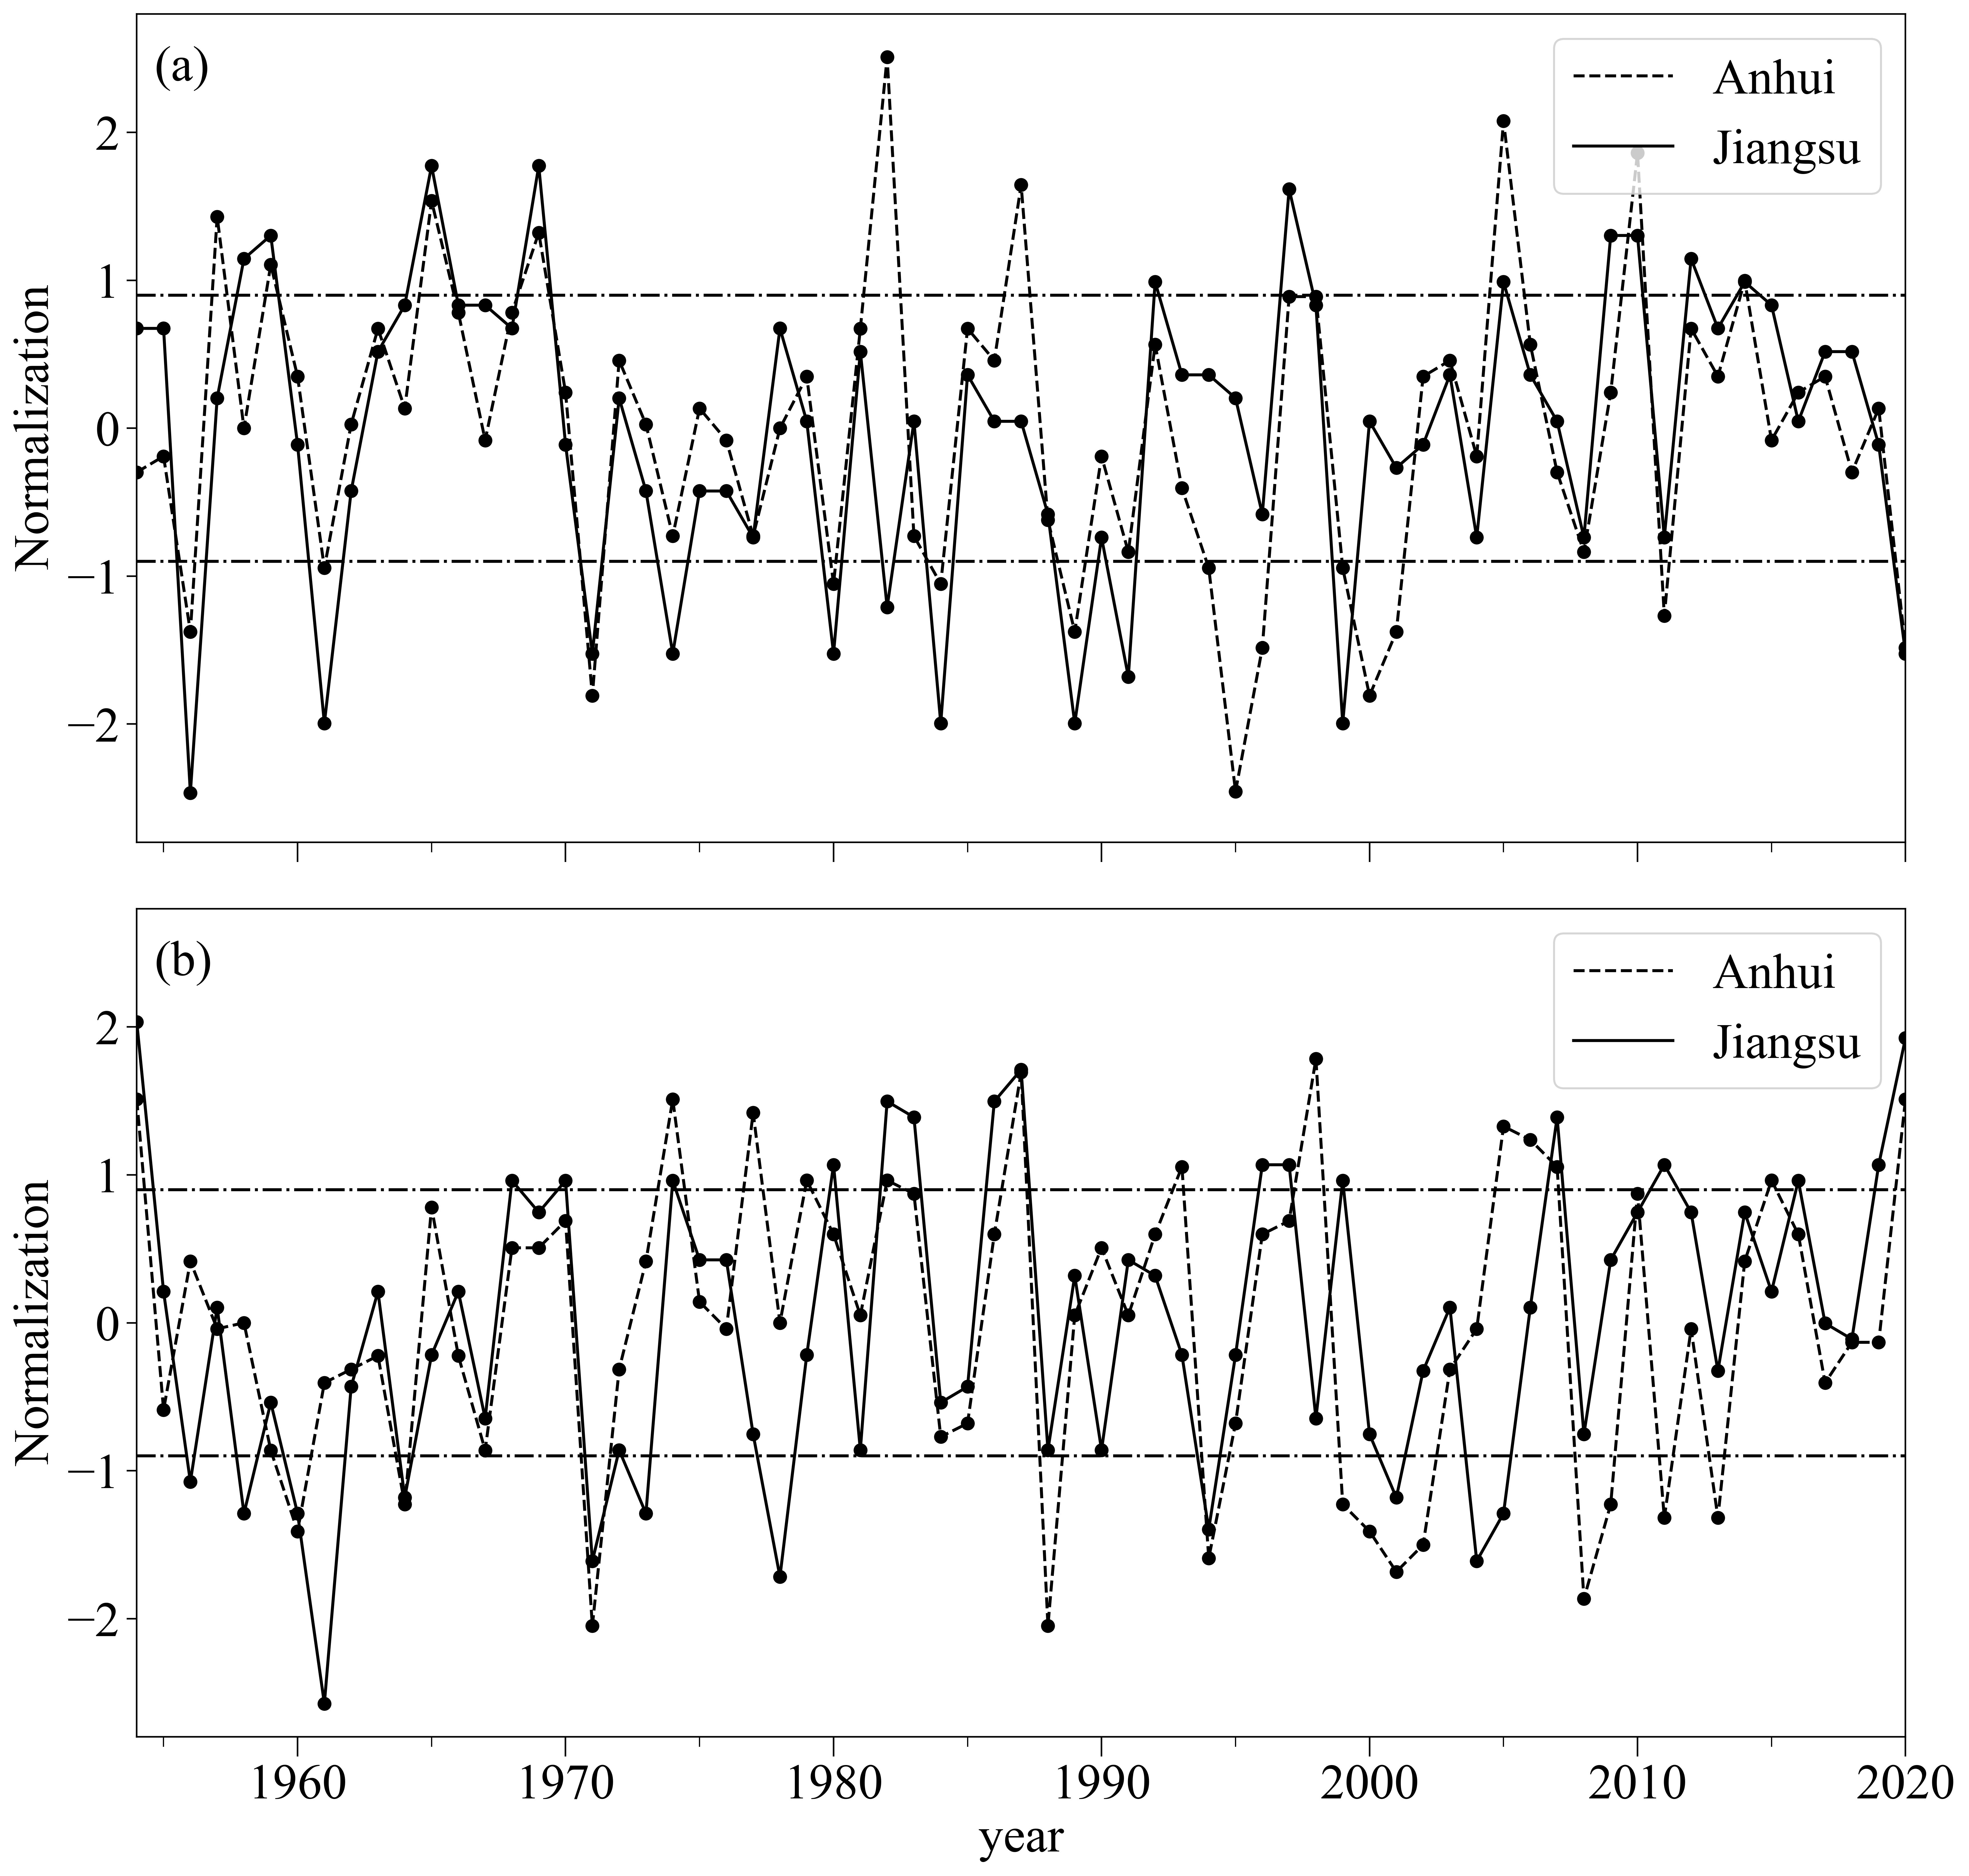

In [7]:
'''绘制安徽、江苏入梅日标准化'''
fig=plt.figure(1,figsize=(16, 16), dpi=500)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.08)

ax1=plt.subplot(2,1,1)
plt.plot(JSyear,ru_norm,c='k',linestyle='--',label='Anhui')
plt.scatter(JSyear,ru_norm,c='k')
plt.plot(JSyear,JSru_norm,color='k',label='Jiangsu')
plt.scatter(JSyear,JSru_norm,c='k')
plt.plot([1954,2020],[0.9,0.9],'k-.')
plt.plot([1954,2020],[-0.9,-0.9],'k-.')

'''------------------------------------------------------------'''
ax2 = plt.gca()
plt.xlim(1954,2020)
plt.ylim(-2.8,2.8)
x1_ticks=np.arange(1955,2021,5)
plt.xticks(x1_ticks, fontsize=20)
plt.yticks(fontsize=25)

plt.setp(ax1.get_xticklabels(), visible=False)

ax2.xaxis.set_major_locator(MultipleLocator(10))# 10的倍数，主坐标
plt.tick_params(which='major',length=10)# 坐标刻度长度
ax2.xaxis.set_minor_locator( MultipleLocator(5))
plt.tick_params(which='minor',length=5)
ax2.yaxis.set_major_locator( MultipleLocator(1))
plt.tick_params(axis='y',which='major',length=5)
plt.ylabel("Normalization", fontsize=25)
plt.legend(loc="upper right",fontsize=25)

ax = fig.add_subplot(2, 1, 1)
ax.text(0.01, 0.92, "(a)", transform=ax.transAxes, fontdict={'size': '25', 'color': 'k'})

'''绘制安徽、江苏出梅日标准化'''    
plt.subplot(2,1,2)
ax2 = plt.gca()
ax = fig.add_subplot(2, 1, 2)
ax.text(0.01, 0.92, "(b)", transform=ax.transAxes, fontdict={'size': '25', 'color': 'k'})
plt.plot(JSyear,chu_norm,c='k',linestyle='--',label='Anhui')
plt.scatter(JSyear,chu_norm,c='k')
plt.plot(JSyear,JSchu_norm,color='k',label='Jiangsu')
plt.scatter(JSyear,JSchu_norm,c='k')
plt.plot([1954,2020],[0.9,0.9],'k-.')
plt.plot([1954,2020],[-0.9,-0.9],'k-.')
plt.xlim(1954,2020)
plt.ylim(-2.8,2.8)
x1_ticks=np.arange(1955,2021,5)
plt.xticks(x1_ticks, fontsize=25)
plt.yticks(fontsize=25)
ax2.xaxis.set_major_locator(MultipleLocator(10))
plt.tick_params(which='major',length=10)
ax.xaxis.set_minor_locator( MultipleLocator(5))
plt.tick_params(which='minor',length=5)
ax2.yaxis.set_major_locator( MultipleLocator(1))
plt.tick_params(axis='y',which='major',length=5)
#plt.title('(b) Meiyu withdraw date',fontsize=20, loc='left')
plt.xlabel("year", fontsize=25)
plt.ylabel("Normalization", fontsize=25)
plt.legend(loc="upper right",fontsize=25)
#plt.savefig('part1.svg')